### Assignment Solution ###

#### Step 1: Import libraries

In [12]:
import numpy as np
import pandas as pd
import seaborn as sns

import scipy.stats as stats
from scipy.stats import ttest_ind
from statsmodels.stats.proportion import proportions_ztest
import statsmodels.api         as     sm
from   statsmodels.formula.api import ols
from   statsmodels.stats.anova import anova_lm

#### Step 2: Read data from CSV

In [2]:
insurance_data = pd.read_csv("Insurance.csv")
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


#### Step 3: EDA
    
    
##### Step 3.1: Shape of the data

In [3]:
insurance_data.shape

(1338, 7)

##### Step 3.2: Data types in data

In [4]:
insurance_data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

##### step 3.3: Checking missing values

In [154]:
insurance_data[insurance_data.isna()==True].count()
#Number of null values are 0

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
#Alternate way to check non-null values
insurance_data.info()
#There are no null values present in the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


##### Step 3.4: 5 point summary of the data

In [7]:
insurance_data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


##### Step 3.5: Distribution of Age, BMI and Charges

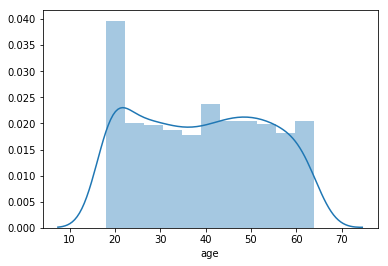

In [8]:
sns.distplot(insurance_data["age"])

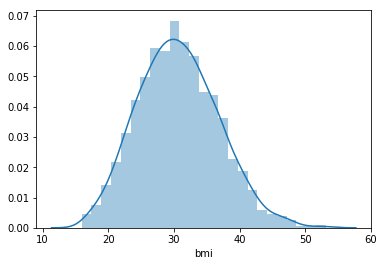

In [9]:
sns.distplot(insurance_data["bmi"])

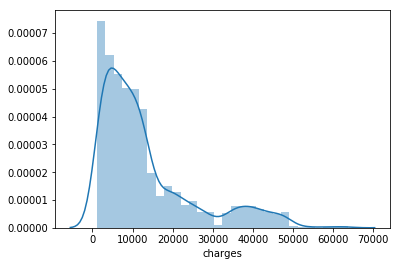

In [10]:
sns.distplot(insurance_data["charges"])

##### Step 3.6: Measure of Skewness in Age, BMI and Charges columns

In [13]:
stats.skew(insurance_data["bmi"])

0.28372857291709386

In [14]:
stats.skew(insurance_data["age"])

0.055610083072599126

In [15]:
stats.skew(insurance_data["charges"])

1.5141797118745743

##### Step 3.7: Outliers in in Age, BMI and Charges columns 

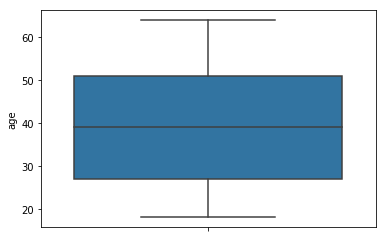

In [40]:
sns.boxplot(y=insurance_data["age"])
#There are no outliers

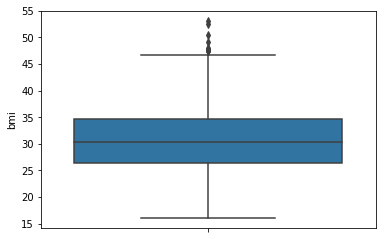

In [41]:
sns.boxplot(y=insurance_data["bmi"])
#There are outliers in the BMI column

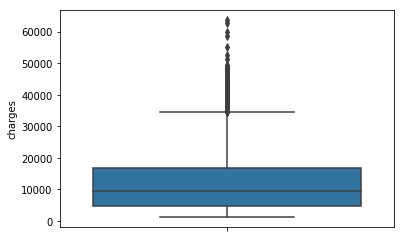

In [42]:
sns.boxplot(y=insurance_data["charges"])
#There are outliers in the Charges column

##### Step 3.8: Distribution of Categorical Variables

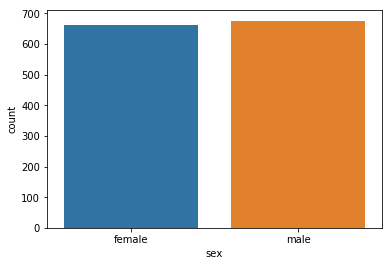

In [54]:
sns.countplot(x="sex", data=insurance_data)

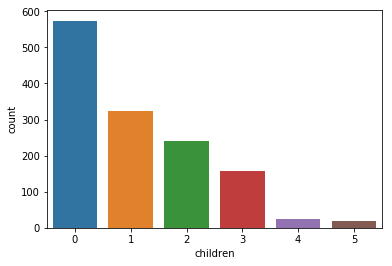

In [56]:
sns.countplot(x="children", data=insurance_data)

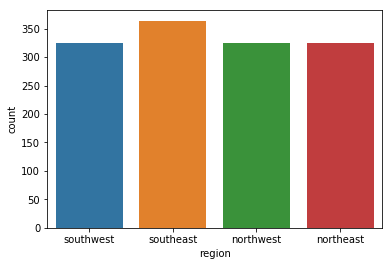

In [57]:
sns.countplot(x="region", data=insurance_data)

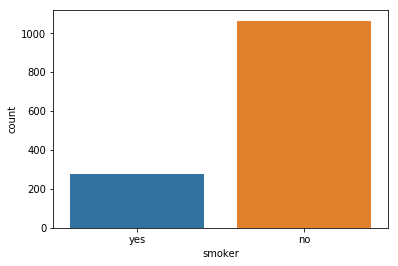

In [58]:
sns.countplot(x="smoker", data=insurance_data)

##### Step 3.9: Pair plot with all the columns in data

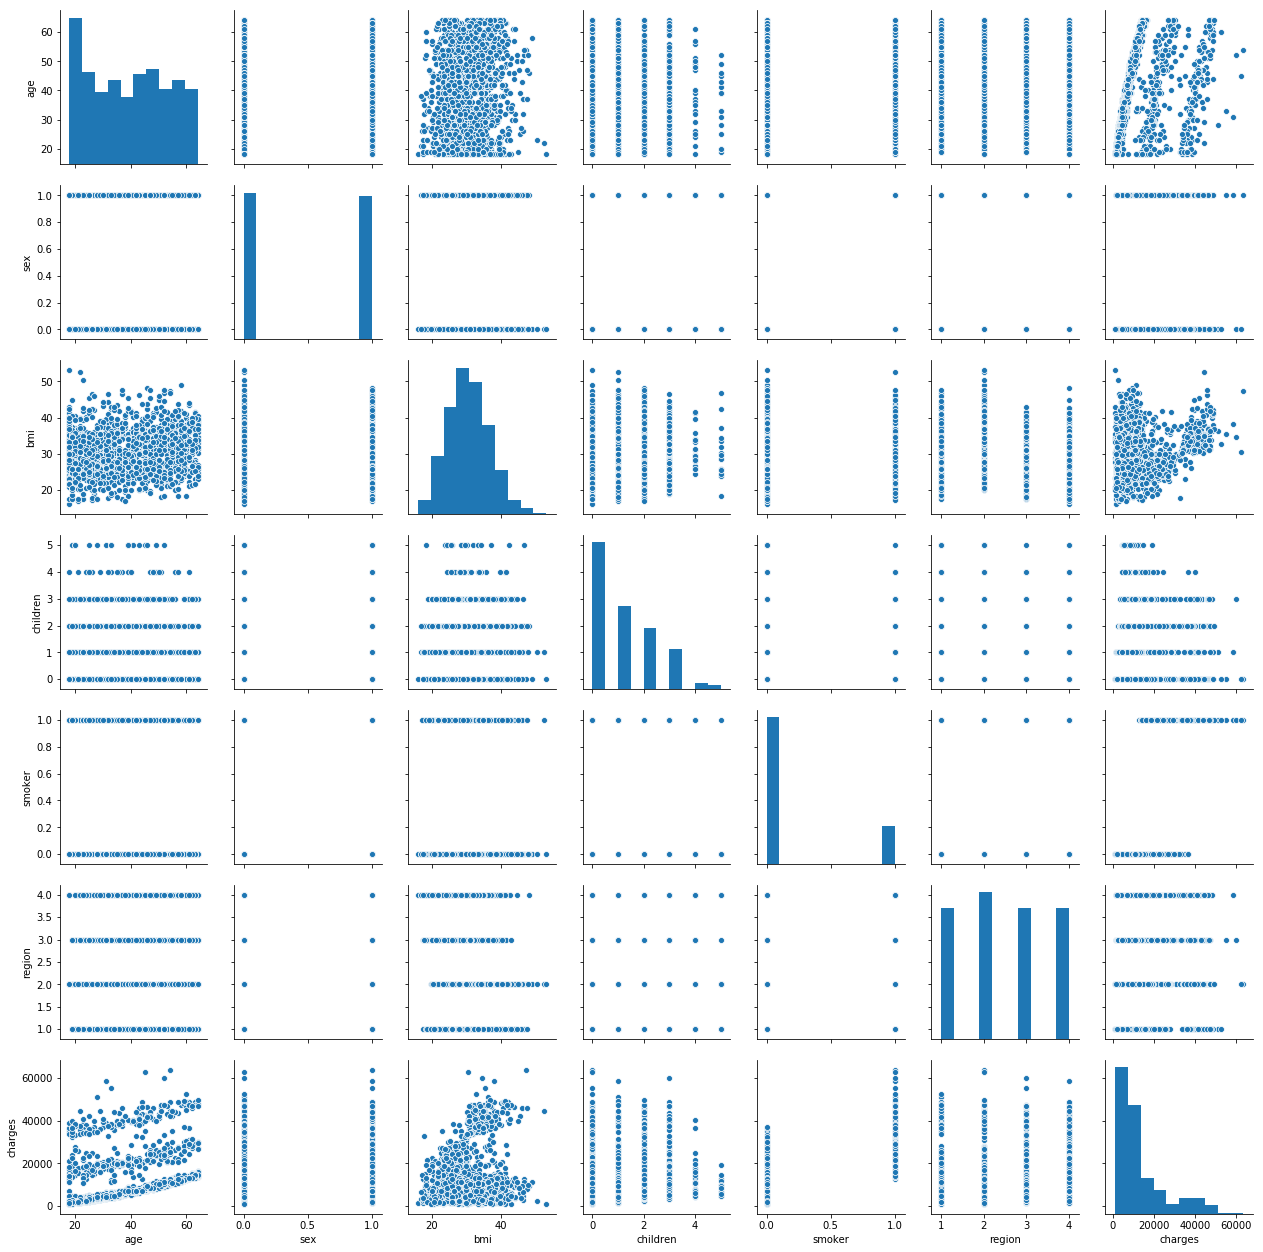

In [69]:
#Creating deep copy of the dataframe
insurance_data_modified = insurance_data.copy()

#Replaceing categorical values with numerical values to include them in pairplot 
insurance_data_modified.region.replace({'southwest':1, 'southeast':2, 'northwest':3, 'northeast':4}, inplace=True)
insurance_data_modified.sex.replace({'female':1, 'male':0}, inplace=True)
insurance_data_modified.smoker.replace({'yes':1, 'no':0}, inplace=True)

sns.pairplot(insurance_data_modified)

### Step 4

##### Step 4.1: Do charges of people who smoke differ significantly from the people who don't?

H0: mu(smoker, charges) = mu(non-smoker,charges)
Ha: mu(smoker, charges) != mu(non-smoker,charges)

alpha = 0.05

In [155]:
#splitting the smoker and non-smoker data
smoker_charges = np.array(insurance_data[insurance_data["smoker"]=="yes"]["charges"])
non_smoker_charges = np.array(insurance_data[insurance_data["smoker"]!="yes"]["charges"])

In [74]:
#t-statistic using smoker charges and non smoker charges data
t_statistic, p_value = ttest_ind(smoker_charges, non_smoker_charges)
print(t_statistic, p_value)

46.664921172723716 8.271435842177219e-283


Inference: p value is significantly smaller than alpha hence null hypothesis is rejected, therefore Charges for people who
smoke differ significantly from the people who don't

##### Step 4.2: Does bmi of males differ significantly from that of females?

H0: mean(male, bmi) = mean(female, bmi)
Ha: mean(male, bmi) != mean(female, bmi)

alpha = 0.05

In [156]:
#splitting Male and Female BMI data
male_bmi = np.array(insurance_data[insurance_data["sex"]=="male"]["bmi"])
female_bmi = np.array(insurance_data[insurance_data["sex"]=="female"]["bmi"])

In [79]:
t_statistic, p_value = ttest_ind(male_bmi, female_bmi)
print(t_statistic, p_value)

1.696752635752224 0.08997637178984932


Inference: p value (~0.09) is greater than alpha (0.05) hence we fail to reject null hypothesis,
Therefore, BMI of males and females do not differ significantly 

##### Step 4.3: Is the proportion of smokers significantly different in different genders?

H0: p(smoker, male) = p(smoker,female)
Ha: p(smoker, male) != p(smoker,female)

alpha = 0.05

In [100]:
#Splitting Male Smokers and Females Smokers data
num_smokers_male = len(insurance_data[((insurance_data["smoker"]=="yes") & (insurance_data["sex"]=="male"))])
num_smokers_female = len(insurance_data[((insurance_data["smoker"]=="yes") & (insurance_data["sex"]=="female"))])
num_male = len(insurance_data[insurance_data["sex"]=="male"])
num_female = len(insurance_data[insurance_data["sex"]=="female"])

In [102]:
counts = np.array([num_smokers_male, num_smokers_female])
nobs = np.array([num_male, num_female])

stat, pval = proportions_ztest(counts, nobs)
print(stat, pval)

2.7867402154855503 0.005324114164320532


Inference: p value (~0.005) is smaller than alpha (0.05) hence we reject the null hypothesis,
Therefore number of smokers is significantly different in different genders

##### Step 4.4: Is the distribution of bmi across women with no children, one child and two children, the same?

H0: mean bmi(female, no children) = mean bmi(female, one child) = mean bmi(female, two children)

Ha: Atleast one mean differs from others

alpha = 0.05

In [117]:
#Extracting Female data from the input data with 0, 1 and 2 children
female_df = insurance_data[insurance_data["sex"] == "female"][["children", "bmi"]]
bmi_df = female_df[female_df["children"] <= 2]
bmi_df.head()

,children,bmi
0,0,27.90
5,0,25.74
6,1,33.44
9,0,25.84
11,0,26.29


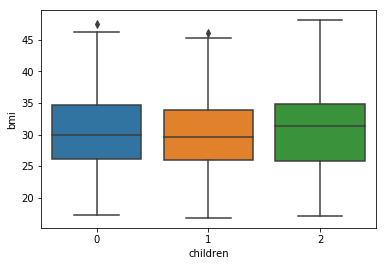

In [118]:
#Boxplot for primary analysis of the 3 datasets
sns.boxplot(x="children",y="bmi", data=bmi_df)

In [119]:
model = ols('bmi ~ children', data = bmi_df).fit()
aov_table = anova_lm(model, typ=2)
print(aov_table)

                sum_sq     df         F   PR(>F)
children      2.512982    1.0  0.068411  0.79376
Residual  20717.738725  564.0       NaN      NaN


Inference: As p_value 0.794 > 0.05, therefore fail to reject the null hypothesis.
Distribution of bmi across women with no children, one child and two children is not significantly different.